In [1]:
import os
from os import listdir
from os.path import join
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import random
from functions import _train, _forecast
from src.plots.systems import plot_forecast

from src.model import *

# FIX: Standardize data
# BUG: transient 0
# TODO: use fit with 1 epoch and then reset model states
# NOTE: Separate system generation to other repo
# TODO: save dt in params.json


folder = '/home/dionisio35/Documents/thesis/data/KS/22/'
data_file = join(folder, random.choice(listdir(folder)))
dt=1
steps = 5

transient = 1000
train_length = 20000
forecast_length = 1000

input_scaling = 0.5 # input sigma
reservoir_degree = 8 # numero de conexiones de nodos del reservoir
spectral_radius = 1.05
reservoir_sigma = 0.6
rewiring = 1.0 # probabilidad de reconexion en reservoir Watts-Strogatz

# FIX
units = 1000 # Numero de nodos del reservoir
seed = 42
reservoir_activation = 'tanh'

regularization = 1e-08
leak_rate = 0.2 # Cuanta informacion se filtra hacia el siguiente estado 0-1(toda-nada)

input_initializer = 'InputMatrix'
input_bias_initializer = 'RandomUniform'
reservoir_initializer = 'WattsStrogatzNX'

In [2]:
model = _train(
    data_file=data_file,
    model='ESN',

    units=units,
    steps=steps,
    transient=transient,
    train_length=train_length,

    input_initializer=input_initializer,
    input_bias_initializer=input_bias_initializer,
    reservoir_initializer=reservoir_initializer,
    reservoir_activation=reservoir_activation,

    input_scaling=input_scaling,
    leak_rate=leak_rate,
    spectral_radius=spectral_radius,
    rewiring=rewiring,
    reservoir_degree=reservoir_degree,
    reservoir_sigma=reservoir_sigma,
    regularization=regularization,
    
    seed=seed,
)

Used data shape:  (50000, 64) Picking values every 5 steps.

Seed: 42

Correcting spectral radius to 1.05
Spectral radius was previously 1.2771597306889941

Ensuring ESP...

1/1 [==============================] - 0s 388ms/step

Harvesting...

1/1 [==============================] - 5s 5s/step
Harvesting took: 5.36 seconds.
Calculating the readout matrix...

Training loss: 1.090383092479234e-05



Used data shape:  (50000, 64) Picking values every 5 steps.
Forecasting free running sequence 1000 steps ahead.

    Ensuring ESP...

    Forecast transient data shape:  (1, 1000, 64)
1/1 [==============================] - 0s 385ms/step

    Predicting...



Output()

    Predictions shape:  (1, 1000, 64)
Forecast loss: nan



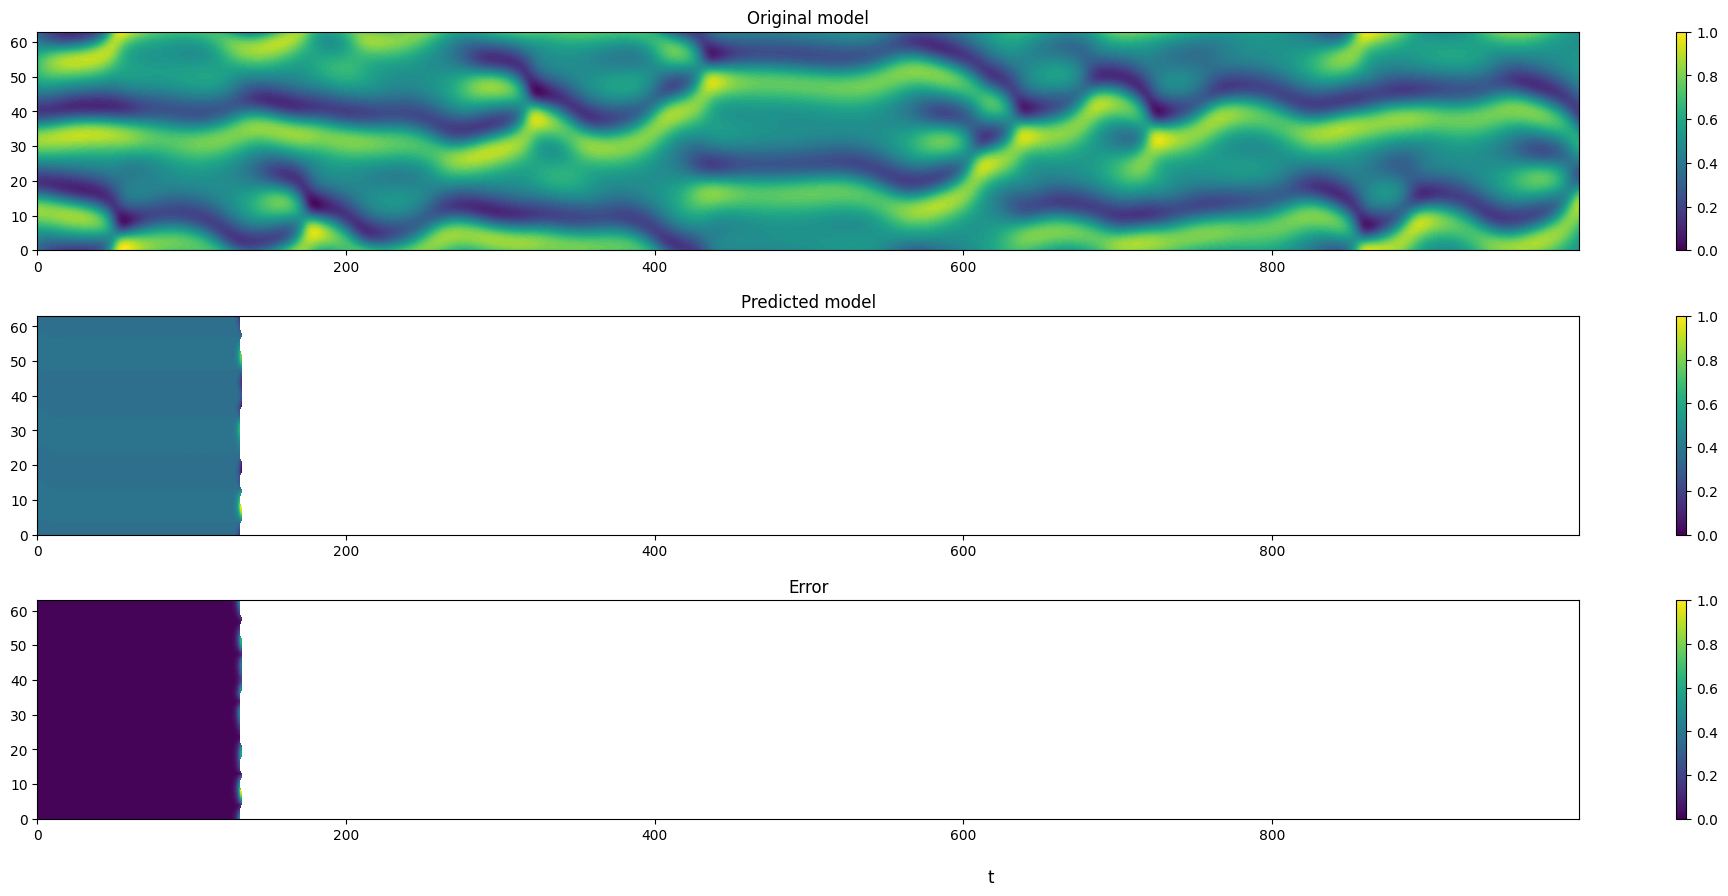

Used data shape:  (50000, 64) Picking values every 5 steps.
Forecasting free running sequence 1000 steps ahead.

    Ensuring ESP...

    Forecast transient data shape:  (1, 1000, 64)
1/1 [==============================] - 0s 327ms/step

    Predicting...



Output()

KeyboardInterrupt: 

In [3]:
for i in listdir(folder):
    file = join(folder, i)
    forecast, val_target = _forecast(
        trained_model=model,
        transient=transient,
        train_length=train_length,
        data_file=file,
        forecast_method='classic',
        forecast_length=forecast_length,
        steps=steps,
    )
    plot_forecast(forecast, val_target)